# MOVIE INDUSTRY EXPLORATION

Movie production can be a lucrative and glamorous business, and yet highly risky.
It is therefore important to choose moves into the movie industry wisely and with precaution.
The movie genres range from drama, comedy, action, adventure, horror, sciFi, and many more. 
Sometimes there is a thin line between movies that we are unable to distinguish one genre from the other. 
In such instances, we find that we can have romance/comedy or comedy/drama or even action/comedy.
The combinations are limitless.

##  Business Understanding

The goal of this project is to provide microsoft with information about the best movies to invest in.     

## Objectives
1. Determine which movie genres are doing well in the industry
2. Find out which movies are most waatched based on rating
3. Find out which movies have the highest value based on their box office (domestic_gross + foreign_gross) 

## Data understanding
The data used in this project comes from movie sites:
The data this project focuses on, is contained in the following tables:
1. bom.movie_gross.csv
2. movie_basics
3. movie_ratings

The project will focus on data about movie ratings, box office and movie genres.

## Data Analysis
The process of data analysis includes data cleaning and analysis, and finally visualization in form of graphs or bar charts.

In [1]:
# Importing relevant modules to assist in data cleaning, analysis and visualization.
import csv
import pandas as pd
import numpy as np
import sqlite3
conn = sqlite3.connect('data.sqlite')
cursor = conn.cursor()
import matplotlib.pyplot as plt
%matplotlib inline


### Table 1: bom.movie_gross

In [2]:
df1 = pd.read_csv('bom.movie_gross.csv')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# checking for duplicates
df1.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [4]:
# checking for missing data and resolving
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [5]:
#Replacing missing values in studio with 'NaN'
df1['studio'].replace('NaN', 'NaN', inplace=True)
df1['studio'].isna().sum()

5

In [6]:
df1['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [7]:
#Replacing missing values in domestic gross with the standard deviation(std)
#Standard deviation was chosen because it is
df1['domestic_gross'].replace('NaN', 'std', inplace=True)
df1['domestic_gross'].isna().sum()

28

In [8]:
df1['foreign_gross'].mode()

0    1200000
Name: foreign_gross, dtype: object

In [9]:
#Replacing missing values in foreign_gross with the most frequent value(mode)
df1['foreign_gross'].replace('NaN', 'mode', inplace=True)
df1['foreign_gross'].isna().sum()

1350

In [10]:
#Confirming NaN values have been replaced
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# Adding box office column which is the sum of domestic and foreign gross to the table
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'], errors='coerce')
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')
df1['box_office'] = df1['domestic_gross'] + df1['foreign_gross']
df1

,title,studio,domestic_gross,foreign_gross,year,box_office
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


In [12]:
# Displaying relevant columns
df1[['title', 'domestic_gross', 'foreign_gross', 'box_office']].head(10)

,title,domestic_gross,foreign_gross,box_office
0,Toy Story 3,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,9.603000e+08
3,Inception,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,7.526000e+08
5,The Twilight Saga: Eclipse,300500000.0,398000000.0,6.985000e+08
6,Iron Man 2,312400000.0,311500000.0,6.239000e+08
7,Tangled,200800000.0,391000000.0,5.918000e+08
8,Despicable Me,251500000.0,291600000.0,5.431000e+08
9,How to Train Your Dragon,217600000.0,277300000.0,4.949000e+08


In [13]:
# Combining bom_movie with tmdb.movies to access genre column from tmdb
df2 = pd.read_csv('tmdb.movies.csv')
merged_df = pd.merge(df1, df2, on='title', how='inner')
merged_df.head(10)

,title,studio,domestic_gross,foreign_gross,year,box_office,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
5,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08,13,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,7.5,6407
6,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,7.2,10057
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000.0,2010,4.157000e+08,22,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,6.3,3196
9,The King's Speech,Wein.,135500000.0,275400000.0,2010,4.109000e+08,25,"[18, 36]",45269,en,The King's Speech,16.798,2010-09-06,7.7,5013


In [14]:
merged_df[['genre_ids', 'domestic_gross', 'foreign_gross']].head(5)

,genre_ids,domestic_gross,foreign_gross
0,"[16, 10751, 35]",415000000.0,652000000.0
1,"[28, 878, 12]",292600000.0,535700000.0
2,"[35, 12, 14, 16, 10751]",238700000.0,513900000.0
3,"[12, 14, 18, 10749]",300500000.0,398000000.0
4,"[12, 28, 878]",312400000.0,311500000.0


In [15]:
merged_df['genre_ids'].replace({'16, 10751, 35':'animation family comedy', '28, 878, 12':'action scifi adventure', 
                    '35, 12, 14, 16, 10751':'comedy adventure fantasy animation family',
                    '12, 14, 18, 10749':'adventure fantasy drama romance', '12, 28, 878':'adventure action scifi'}, inplace=True)
merged_df

,title,studio,domestic_gross,foreign_gross,year,box_office,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.0,NaN,2018,NaN,16803,"[53, 28]",459814,en,The Escape,0.600,2015-08-14,7.0,1
2699,The Escape,IFC,14000.0,NaN,2018,NaN,19053,"[53, 28]",417004,en,The Escape,1.176,2016-10-23,6.6,10
2700,Souvenir,Strand,11400.0,NaN,2018,NaN,18483,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14
2701,The Quake,Magn.,6200.0,NaN,2018,NaN,24107,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81


# Table 2: movie_basics 





In [16]:
#Acquiring database path so as to view our data
conn = sqlite3.connect('im.db')
db_path = conn.execute("PRAGMA database_list;").fetchall()[0][1]


In [17]:
#Previewing available tables from the database
table_name_query = """SELECT name
                      AS 'Table Names' 
                      FROM sqlite_master
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,joined_mb_mr
9,new_table_name


In [18]:
#Previewing data from movie_basics
first_query = """
SELECT *
FROM movie_basics
;
"""
pd.read_sql(first_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [19]:
#Checking for null values
second_query = """
SELECT genres, COUNT(*)
FROM movie_basics
WHERE genres IS NULL
;
"""
pd.read_sql(second_query, conn)

,genres,COUNT(*)
0,None,5408


In [20]:
#Checking for top movies in terms of genre
third_query = """
SELECT genres, count(*) AS frequency
FROM movie_basics
GROUP by genres
ORDER BY frequency DESC
LIMIT 10
;
"""
pd.read_sql(third_query, conn)




,genres,frequency
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
5,"Comedy,Drama",3519
6,Thriller,3046
7,Action,2219
8,"Biography,Documentary",2115
9,"Drama,Romance",2079


#  Table 3(movie_ratings)

In [21]:
#Previewing data from movie_ratings
fourth_query = """
SELECT *
FROM movie_ratings
;
"""
pd.read_sql(fourth_query, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [22]:
# Showing genres rating from highest to lowest 
# The inner subquery calculates the count of movies for each genre and their respective averagerating.
# The outer query then computes the weighted average rating for each genre by summing the product of 
# averagerating and movie_count, divided by the total movie_count for that genre.
new_table = """
SELECT genres, SUM(averagerating * movie_count) / SUM(movie_count) AS weighted_average_rating
FROM (
    SELECT genres, averagerating, COUNT(*) AS movie_count
    FROM movie_basics
    JOIN movie_ratings USING (movie_id) 
    GROUP BY genres, averagerating
) AS subquery
GROUP BY genres
ORDER BY weighted_average_rating DESC   
;
"""
df = pd.read_sql(new_table, conn)

df.to_sql('new_table', conn, index=False, if_exists='replace')

df


,genres,weighted_average_rating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
...,...,...
919,"Crime,Music",2.4
920,"History,Sci-Fi,Thriller",2.3
921,"Adventure,Crime,Romance",2.3
922,"Adult,Horror",2.0


In [24]:
# Grouping genres to avoid overcrowding of lables when plotting
genre_ratings = df.groupby('genres')['weighted_average_rating'].mean().reset_index()

df = genre_ratings.sort_values(by='weighted_average_rating', ascending=False).head(10)
df

,genres,weighted_average_rating
449,"Comedy,Documentary,Fantasy",9.4
633,"Documentary,Family,Musical",9.3
851,"History,Sport",9.2
837,Game-Show,9.0
882,"Music,Mystery",9.0
775,"Drama,Short",8.8
679,"Documentary,News,Reality-TV",8.8
681,"Documentary,News,Sport",8.8
471,"Comedy,Drama,Reality-TV",8.8
717,"Drama,Fantasy,War",8.8


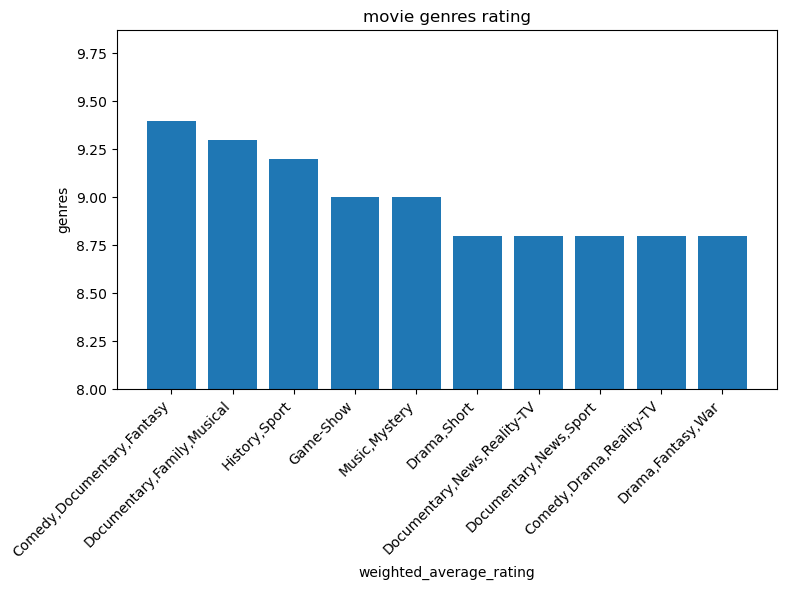

In [30]:
# Plotting movie genres against average rating
plt.figure(figsize=(8, 6))
plt.bar(df['genres'], df['weighted_average_rating'])
plt.xlabel('weighted_average_rating') 
plt.ylabel('genres')  
plt.title('movie genres rating') 
plt.xticks(rotation=45, ha='right') 
plt.ylim(bottom=8) 
plt.tight_layout() 
plt.show()